In [1]:
!pip install keras

In [2]:
pip install --reinstall keras


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --reinstall


In [3]:
pip install keras==<version>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install keras==<version>'


In [4]:
import sys
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


In [5]:
import sys
sys.path.append("/path/to/keras/installation/directory")

import keras

In [ ]:
!pip show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [ ]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [ ]:
path = '/content/1661-0.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [ ]:
tokenizer = RegexpTokenizer(r'w+')
words = tokenizer.tokenize(text)

In [ ]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [ ]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['w', 'w', 'w', 'w', 'w']
www


In [ ]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [ ]:
print(X[0][0])

[ True False]


In [ ]:
print(X.shape)

(11530, 5, 2)


In [ ]:
print(Y.shape)

(11530, 2)


In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [ ]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])

# Check the shape of the target data
print(Y.shape)

# Modify the model to match the target data
# ...

# Check the data preprocessing steps
# ...

# Use a different loss function if necessary
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X, Y, validation_split=0.05, batch_size=2, epochs=2, shuffle=True).history

(11530, 2)
Epoch 1/2
5477/5477 [==============================] - 39s 7ms/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.2119 - val_accuracy: 0.9844
Epoch 2/2
5477/5477 [==============================] - 36s 7ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.2174 - val_accuracy: 0.9844


In [ ]:
!pip install keras-vis

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt

# pickle
import pickle

# tf and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model



In [8]:
# Get the text file from here :
# https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

file = open("/content/1661-0.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)

data = ""

for i in lines:
    data = ' '. join(lines)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“', '').replace("”", '')

data = data.split()
data = ' '.join(data)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Sherlock Holmes Author: Arthur Conan Doyle Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set en"

In [9]:
len(data)

573660

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[142, 4680, 1, 986, 5, 125, 33, 46, 556, 2164]

In [11]:
len(sequence_data)

108958

In [12]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

8624

In [13]:
sequences = []
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The length of sequences :", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The length of sequences : 108955


array([[ 142, 4680,    1,  986],
       [4680,    1,  986,    5],
       [   1,  986,    5,  125],
       [ 986,    5,  125,   33],
       [   5,  125,   33,   46],
       [ 125,   33,   46,  556],
       [  33,   46,  556, 2164],
       [  46,  556, 2164, 2165],
       [ 556, 2164, 2165,   27],
       [2164, 2165,   27,  987]])

In [14]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)

In [15]:
print("Data :\n", X[:10])
print()
print("Response :\n", y[:10])

Data :
 [[ 142 4680    1]
 [4680    1  986]
 [   1  986    5]
 [ 986    5  125]
 [   5  125   33]
 [ 125   33   46]
 [  33   46  556]
 [  46  556 2164]
 [ 556 2164 2165]
 [2164 2165   27]]

Response :
 [ 986    5  125   33   46  556 2164 2165   27  987]


In [16]:
y = to_categorical(y, num_classes=vocab_size)
y[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             86240     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8624)              8632624   
                                                                 
Total params: 21767864 (83.04 MB)
Trainable params: 21767864 (83.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


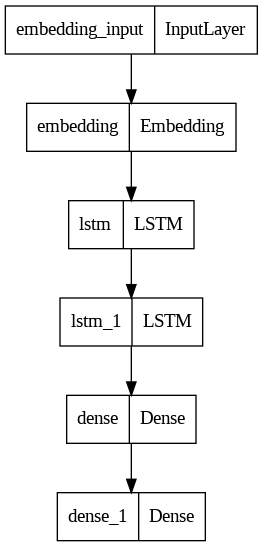

In [19]:
keras.utils.plot_model(model, show_layer_names=True)

In [20]:
checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
lstm = model.fit(X, y, validation_split=0.2, epochs=10, batch_size=128, shuffle=True, callbacks=[checkpoint]).history

Epoch 1/10
681/681 [==============================] - ETA: 0s - loss: 6.5837
Epoch 1: loss improved from inf to 6.58369, saving model to nextword1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


681/681 [==============================] - 724s 1s/step - loss: 6.5837 - val_loss: 6.5264
Epoch 2/10
681/681 [==============================] - ETA: 0s - loss: 6.0146
Epoch 2: loss improved from 6.58369 to 6.01459, saving model to nextword1.h5
681/681 [==============================] - 678s 995ms/step - loss: 6.0146 - val_loss: 6.2610
Epoch 3/10
681/681 [==============================] - ETA: 0s - loss: 5.6061
Epoch 3: loss improved from 6.01459 to 5.60605, saving model to nextword1.h5
681/681 [==============================] - 674s 990ms/step - loss: 5.6061 - val_loss: 6.2279
Epoch 4/10
681/681 [==============================] - ETA: 0s - loss: 5.3283
Epoch 4: loss improved from 5.60605 to 5.32828, saving model to nextword1.h5
681/681 [==============================] - 676s 993ms/step - loss: 5.3283 - val_loss: 6.2473
Epoch 5/10
681/681 [==============================] - ETA: 0s - loss: 5.0954
Epoch 5: loss improved from 5.32828 to 5.09544, saving model to nextword1.h5
681/681 [======

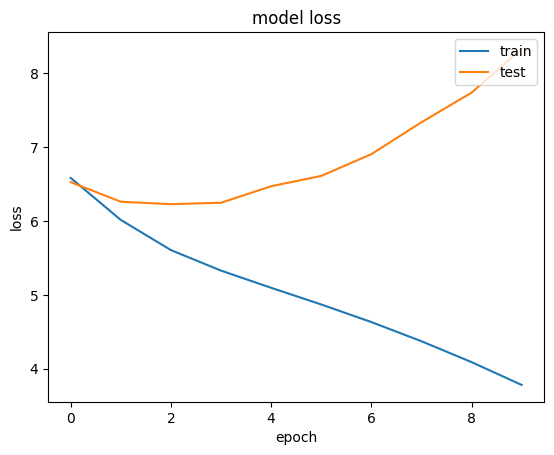

In [21]:
plt.plot(lstm['loss'])
plt.plot(lstm['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# Results

In [22]:
model = load_model("nextword1.h5")
tokenizer = pickle.load(open("tokenizer1.pkl", 'rb'))

In [23]:
def predict_next_words(model, tokenizer, text) :

    sequence = tokenizer.texts_to_sequences([text])
    sequence = np.array(sequence)

    preds = np.argmax(model.predict(sequence))
    predicted_word = ""

    for key, value in tokenizer.word_index.items() :
        if value == preds :
            predicted_word = key
            break

    return predicted_word

In [24]:
l = ["The Adventures of", "by Arthur Conan", "it is all", "0"]

for i in l :

    text = i

    if text == "0" :
        print()
        print("Execution completed...")
        break

    else :
        try :
            text = text.split(" ")
            text = text[-3:]
            print("Input :", i)
            print("Output : ", i, predict_next_words(model, tokenizer, text))
            print()

        except Exception as e :
            print("Error occured : ", e)
            continue

Input : The Adventures of
1/1 [==============================] - 2s 2s/step
Output :  The Adventures of the

Input : by Arthur Conan
1/1 [==============================] - 0s 48ms/step
Output :  by Arthur Conan doyle

Input : it is all
1/1 [==============================] - 0s 52ms/step
Output :  it is all that


Execution completed...
